<br>

# Fundamentals of Data Analysis

## Project 2020 - Peter Finnerty

***

<br>

## Instructions:

<br>
In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. 

The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the
following items:

1. Jupyter notebook that performs simple linear regression on the data set.


2. In that notebook, an explanation of your regression and an analysis of its accuracy.


3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

***

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

<br>

## 1. Overview

### 1.1. Defining Linear Regression

This project seeks to exemplify the use of simple linear regression on the Powerproduction dataset. In order to do this it is first necessary to provide an overview of Linear Regression. Furthermore, it is necessary to discuss how Linear Regression has applications in both Statistics and Machine Learning.

Linear Regression developed out of the field of Statistics as a way to understand the relationsip between input and output variables. As Machine Learning is concerned with minimizing the error of a model or making the most accurate predictions possible, Linear Regression algorithms became utilised in both fields (MachineLearningMastery.com). 

Algebraic Simultaneous Equations as studied in second level education, suggest that there is a linear relationship between input variables (x) and a single output variable (y) and that y can be calculation from a combination of x variables (MachineLearningMastery.com). 

At second level, Linear Regression is studied at the most basic level in the equation of a line as seen below:

<img src="https://i.pinimg.com/originals/d3/36/bd/d336bddce77d0769448561fde53b0372.jpg" style="width: 450px;">                                                                                                         

This is a useful basis from which to expand one's knowledge of Linear Regression, beyond the application in Algebra to Data Analysis and more specifically, to Simple Linear Regression on a Dataset.

In the above formula, *m* is called the angular coefficient and *c* is the intercept. When we look at a dataset, and investigate all the vectors in terms of fitting a straight line, we are searching the values of *m* and *c* that provide the most appropriate position of the line (finxter.com). 

Regression as a basic tool in statistics is the study of how a dependent variable changes as an independent variable changes. 

As a specific form of Regression, Simple Linear Regression deals with quantitative variables. More specifically, it is used to determine the strength of a relationship between two variables (such as rainfall and soil erosion) or, to determing the value of a dependent quantitative variable where a certain independent variable is known (scribbr.com).  

In [2]:
df = pd.read_csv("powerproduction.txt")

power = df["power"]
#power = pd.DataFrame(power)

speed = df["speed"]
#speed = pd.DataFrame(speed)

## 1.3. Dataset Details

<br>

***

### Shape

The Powerproduction dataset has 2 columns and 500 rows, as demonstrated in the cell below.

In [12]:
df.shape

(500, 2)

<br>

***

### Variables

The variables presented in the two columns are Speed and Power.

In [14]:
list(df.columns)

['speed', 'power']

The Speed variable relates to wind speed that affects the rate at which a wind turbine spins.

The Power variable reflects the level of power produced at each observation of speed.

### Relationship Indicates Independent and Dependent Variables

**Independent Variable:** Speed

**Dependent Variable:** Power

It is indeed intuitive that Speed is the Independent variable and that Power is the Dependent Variable, as we know from real-world logic that the rate of wind speed affects the level of power that is produced, but the power does **not** affect the wind Speed.

By investigating the first 10 and last 15 rows of both variables, a number of key observations can be made.

In [27]:
speed.head(10), power.head(10)

(0    0.000
 1    0.125
 2    0.150
 3    0.225
 4    0.275
 5    0.325
 6    0.400
 7    0.450
 8    0.501
 9    0.526
 Name: speed, dtype: float64,
 0    0.000
 1    0.000
 2    0.000
 3    0.000
 4    0.000
 5    4.331
 6    5.186
 7    3.826
 8    1.048
 9    5.553
 Name: power, dtype: float64)

**Speed:** For almost every Speed observation, there is a consistent increase of 0.025(km/hour). There are a number if exceptions to this, such as from index 0, to index 1, which goes directly from 0.000 to 0.125.

**Power:** The Power variable, indicates that no power is produced for the first 5 observations. When Speed reaches 0.325 however, power output jumps to 4.331.

In [28]:
speed.tail(15), power.tail(15)

(485    24.249
 486    24.299
 487    24.349
 488    24.374
 489    24.399
 490    24.499
 491    24.525
 492    24.575
 493    24.650
 494    24.750
 495    24.775
 496    24.850
 497    24.875
 498    24.950
 499    25.000
 Name: speed, dtype: float64,
 485    103.700
 486     93.694
 487     93.078
 488     98.223
 489     95.117
 490      0.000
 491      0.000
 492      0.000
 493      0.000
 494      0.000
 495      0.000
 496      0.000
 497      0.000
 498      0.000
 499      0.000
 Name: power, dtype: float64)

Similarly, at the tail end of the dataset, when Speed reaches 24.499, Power drops from 95.117, to 0. 

This reflects the way that wind trubines production has a minimum and maximum wind speed required for the production of power.

<br>

***

### The Mean Value

##### Independent Variable: Speed

In [29]:
mean_speed = sum(speed / float(len(speed)))
mean_speed

12.590398000000002

As is seen above the Mean value of the 'Speed' variable is **12.59**,

##### Dependent Variable: Power

In [4]:
mean_power = sum(power) / float(len(power))
mean_power

48.014584

The Mean value of the Power variable is **48.01**.

### The Variance

Variance is the measure of the spread between numbers in a data set. In other words, it means how far each number in the set is from the mean (Dhiraj, K, 2020).

In [5]:
# Create function to calculate the variance
def variance(values, mean):
    return sum([(i-mean)**2 for i in values])

In [6]:
variance_speed, variance_power = variance(df["speed"], mean_speed), variance(df['power'], mean_power)
variance_speed , variance_power

(26048.04877979798, 864154.5409834714)

Variance of the Speed variable: **26048.05**.

Variance of the Power variable: **864154.54**.

### Covariance

Covariance is the measure of the directional relationship between two random variables. In other words, covariance measures how much two random variables vary together (Dhiraj, K, 2020).

In [7]:
# Create function to calculate covariance between Speed and Power
def covariance(speed, mean_speed, power , mean_power):
    covariance = 0.0
    for p in range(len(speed)):
           covariance = covariance + (speed[p] - mean_speed) * (power[p] - mean_power)
    return covariance

In [8]:
covariance_speed_power = covariance(df['speed'],mean_speed,df['power'],mean_power)
covariance_speed_power

128093.77177178406

Covariance between both variables: **128093.77**.

### The Terms of the Linear Equation: Y = mX + c

#### Y = Power (dependent variable)

#### X = Speed (independent variable)

m is the slope *or* **the covariance of Power / the variance of Speed**

In [9]:
m = covariance_speed_power/ variance_speed
m

4.917595665404674

Therefore, **m = 4.918**

c is the constant *or* **mean of Power *  mean of Speed**

In [10]:
c = mean_power - m * mean_speed
c

-13.89990263051969

Therefore, **c = -13.89**

<br>

***

## 1.2. Glossary of Regression Terms

### 1.2.1. Coefficients <span style="color: blue;">(*coef*)</span>

In the regression of a dataset, the coefficients describe the statistical relationship between the independent variables and the dependent variables.

The sign of the coefficent can tell you the direction of the relatioship between the variables. A positive sign identifies that as the independent variable increases, the mean of the dpendent variable also increases, whislt a negative sign suggests a decrease.

The value of the coefficient describes how the mean of the dependent variable changes in relation to the independent variable.

Whilst carrying out regression on an indepedent variable and a dependent variable, it is important to hold the other variables 'constant'. That is to say it is imperative to study the effect of the independent variable on each dependent variable in isolation from the others (statisticsbyjim.com).

The coefficients of the output are estimates of the actual data population, therefore, it is important to ensure that the model for regression follows best practice for that particular type of regression.

<br>

***

### 1.2.2. Coefficient of Determination <span style="color: blue;">*R²*</span>

#### <span style="color: green;">*High Percentage R² = Good fit; Low Percentage R² = Bad fit*</span>

R² is the percentage of the response variable variation of a linear model. It measures how close the data are fitted by a line of regression (Frost, Statistics By Jim).

R² is a valuable indicator for a Linear-regression model (including Polynomial models), however, it is important to check the test and training data of the model for signs of unwanted bias.


***

### 1.2.2. Standard Error of the Coefficient  <span style="color: blue;">(*SE coef.* or *Std. Err.*)</span> and t-value  <span style="color: blue;">(*t*)</span>

#### <span style="color: green;">*Std. Err: Low Values = Good fit; High Values = Bad fit*</span>

#### <span style="color: brown;">*t-value: High Values = Good fit; Low Values = Bad fit*</span>

The Standard Error measures the accuracy of the unknown coefficient of the model. It is a floating point number that is always positive. The smaller the Std. Err. the more accurate the estimate is (Minitab.com). 

Dividing the coefficient by the standard error will produce a t-value or t-statistic. As a lower Std. Err. indicates lower error and the t-value calculates how many times the error divides into the coefficent itself, a larger t-value indicates greater accuracy. 

As a result, the t-value is essentially a measure of the error in relation to the coefficient.

***

### 1.2.3. P-Values  <span style="color: blue;">(*p*)</span>, the Null Hypothesis <span style="color: blue;">(*H0*)</span> and the Significance Level  <span style="color: blue;">(*α* or *alpha level*)</span>   

#### <span style="color: green;">Good Fit: when *p-value* < *Significance Level*, and H0 is rejected </span>

P-values work together with Coefficients to indicate to the statistical value produced in the Regression process. Specifically, the P-values *of* the coefficients identify whether the relationships observed in a sample exist throughout the population (StatisticsByJim). 

The p-value is a number between 0 and 1.

For each independent variable, there is a possibility that the variable has no correlation to the dependent variable, in which case there is not enough proof to display a relationship. This lack of a relationship is known as the Null Hypothesis and the P-values can test for this.

If it is first necessary to reject the Null Hypothesis in order to determine that there is a significant enough effect between the variables in your sample in order to conclude that the same effect is present in the wider population. The significance level is the probability of dismissing the Null Hypothesis when it in fact is evident.

The Significane Level, is a pre-determined threshold. It is normally set to a value of 0.05 (5%). However, the researcher must identify an appropriate threshold of Significance Level, from which to compare to the p-value.

If the P-value is less than the significance level, the Null Hypothesis can be sufficiently rejected. 

Contrasly, if the P-value is higher than the significance level, the Null Hypothesis cannot be rejected and there is not enough evidence to infer a relationship between the independent and dependent variable.

As the coefficients, P-values and the Significance level are determined for each variable in isolation, this can determine what variables should be included in the Regression analysis. 


<br>

***

### Table of Stats 

| | Coef. |R² (Test Data) | Std.Err.   | p-value | Sig. Level  |t-value    |  |    | 
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| **Simple Linear Regression**   |   |    |    |    |    |   |    |    |
| *Numpy Model* |   |    |    |    |   |   |   |    |
|  |[4.917, -13.899]|    |    |    |   |   |    |    |
| *Sklearn Model*  |   |    |    |    |   |   |    |    |
|  | 4.866  |  0.746  |    |    |   |   |    |    |
|  **Polynomial Regression**   |    |    |    |   |   |    |    |
|  *Numpy Model* |   |    |    |    |   |   |    |    |
|  |   |    |    |    |   |   |    |    |
|  *Sklearn Model* |   |    |    |    |   |   |    |    |
|  | [-13.332,   1.937,  -0.053]   | 0.881   |    |    |   |   |    |    |
|  |   |    |    |    |   |   |    |    |

Sklearn SLR Coefficient:  [4.8664947]
R² of Training Data:  0.7228817156951498
R² Test Data:         0.7464131693198832

<br>

***

## 1.6. Attempting Simple Linear Regression on Powerproduction Dataset

We will not attempt to carry out Simple Linear Regression on the Powerproduction Dataset using Numpy's polyfit() method. This is necessary to understand whether Simple Linear Regression is appropriate for this data.

At a later point, we will create our own version of the polyfit() method in order to carry out regression without Numpy.

Below, the Powerproduction dataset has been turned into a Pandas DataFrame and the two variables plotted on a scatterplot.

Following this, a straight line is plotted.

In [45]:
import pandas as pd
import seaborn as sns

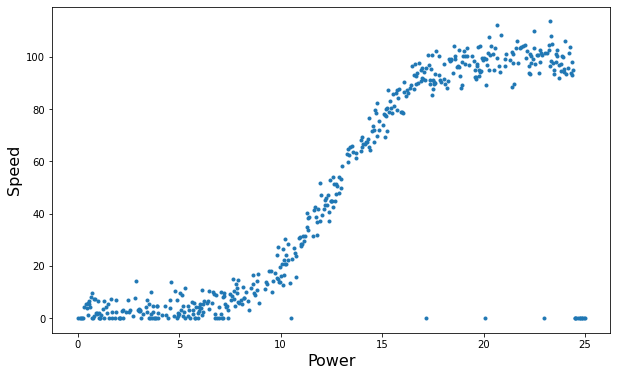

In [46]:
Plot_1 = plt.plot(speed, power, '.')
plt.xlabel("Power")
plt.ylabel("Speed")

Plot_1

Examining the above graph, a curve is noticed in the data as Speed and Power increase. There is a strong concentration of vectors in the bottom left: 0-8 for Speed and 0-10 for Power. Furthermore, there is a concentration in the top right: 17-35 for Speed and 90-110 for Power. Infact it appears from simply looking at the plot that the majority of the vectors of the dataset are located in these two zones.

The dispersion of datapoints will be further explored to examine the relationship. This relationship could be explained by a particular phenomenon that occurs when producing power from wind resources. 

For now, the plot is enough to assume that simple linear regression may not be appropriate for this dataset.

Nevertheless we will carry out Simple Linear Regression on this dataset.

In [47]:
speed = speed.values.flatten()

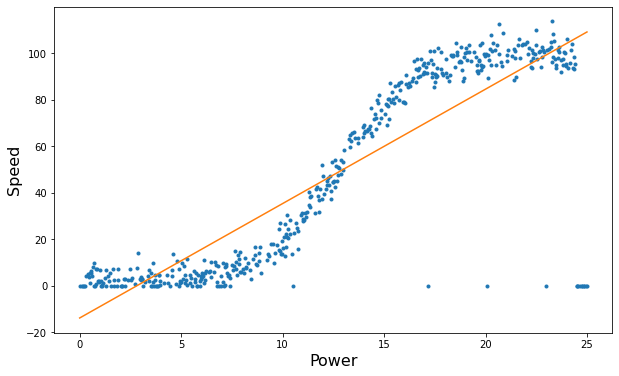

In [48]:
Plot_2 = plt.plot(speed, power, '.')
plt.xlabel("Power")
plt.ylabel("Speed")



coeffs = np.polyfit(speed, power, 1)

plt.plot(speed, coeffs[0] * speed + coeffs[1], '-')

Plot_2

In [49]:
coeffs

array([  4.91759567, -13.89990263])

Considering that Simple Linear Regression produces a line that does not fit well, it is evident that we must turn to Non-linear Regression, i.e. fitting a curved line, in order to fit the most appropriate line to the dataset.

<br>

***

### 1.8. What Does Curve Fitting Require?

#### The Basis Function

Curve fitting first requires creating the form of the *Mapping Function*, this is known as the *Basis Function*. 

To begin with, we do not yet know the form of the Mapping function that maps examples of inputs and outputs, but we can approximate it by creating the Basis function (Machine Learning Mastery).

Once the Basis Function has been approximated, the parameters to the function can be identified that result in the least amount of error. 

By comparing the output from the Basis Function to the observed output, we can calculate the error.

When there are two variables involved in a dataset, as there is with the Powerproduction Dataset, the independent variable will form the input of the Mapping function, whilst the dependent variable will form the output.





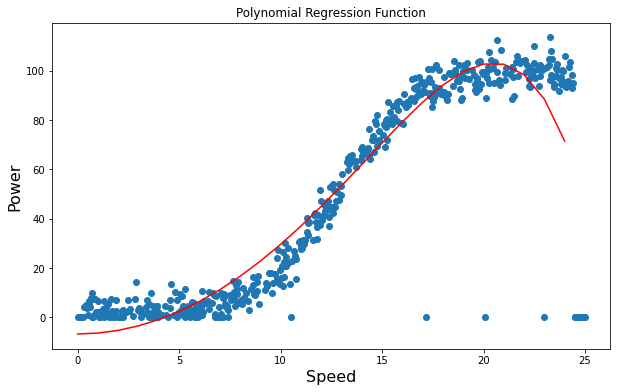

In [50]:
# define the basis function
def basis(x, a, b, c):
    return a * np.power(x, 7) + b * x**2 + c

# choose the input and output variables
x, y = df["speed"], df["power"]
# curve fit
exponents, _ = curve_fit(basis, x, y)
# summarize the parameter values
a, b, c = exponents

# plot inputs and outputs
plt.scatter(x, y)

# Use np.arange to inputs from smallest vector to largest
x_array = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_array = basis(x_array, a, b, c)
# create a line plot for the mapping function
plt.plot(x_array, y_array, color='red')
plt.title("Polynomial Regression Function")
plt.xlabel("Speed")
plt.ylabel("Power")

plt.show()

In [51]:
exponents

array([-2.89639577e-08,  3.66538775e-01, -6.77133958e+00])

In [52]:
y_array

array([ -6.77133958,  -6.40480083,  -5.30518818,  -3.47255394,
        -0.90719372,   2.389867  ,   6.41594828,  11.16520735,
        16.62640022,  22.77976751,  29.59289838,  37.01542664,
        44.9724131 ,  53.35626806,  62.01706812,  70.75112117,
        79.28763372,  87.27333454,  94.25490854,  99.65909511,
       102.77030475, 102.7056081 ,  98.38695142,  88.51045248,
        71.51263087])

<br>

***

### 2.1. Carrying Out Simple Linear Regression Using Sklearn

In [53]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error

In [54]:
df = pd.DataFrame(pd.read_csv("powerproduction.txt") )

# Reshape both columns to be 2D and name as x/y
x = df["speed"]
x = x.values.reshape(500, 1)

y = df["power"]
y = y.values

#Split the dataset into Training set and Test Set, set test_size to
# 2.5: train is 75% the size of the ful dataset and test is 25% the 
# size of full dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size= 0.25, random_state=0)

# Create model variable, set to LinearRegression() function
# Use .fit() to adust weight of x and y data
model = LinearRegression().fit(x_train, y_train)

# Use the trained model to predict tests
y_predict = model.predict(x_test)

# Print Model coefficient
coefficient_2 = model.coef_
print("Sklearn SLR Coefficient: ", coefficient_2)

# Print R² of training data
train_r_sq_2 = model.score(x_train, y_train)
print("R² of Training Data: ", train_r_sq_2)

# Print R² of test data
test_r_sq_2 = model.score(x_test, y_test)
print("R² Test Data:        ", test_r_sq_2)

Sklearn SLR Coefficient:  [4.8664947]
R² of Training Data:  0.7228817156951498
R² Test Data:         0.7464131693198832


***

### Scatterlot of Training Data and Test Data With Regression

Text(0, 0.5, 'Modelled Power (Dependent Variable)')

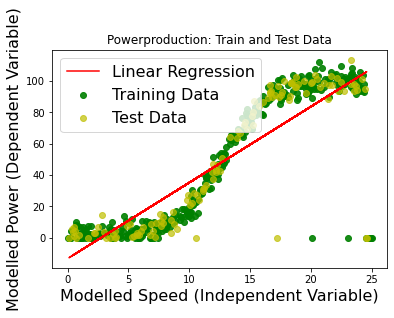

In [55]:
plt.plot(x_test, y_predict, color='r', label="Linear Regression")

plt.scatter(x_train, y_train, label="Training Data", color='g', 
            alpha=.9)
plt.scatter(x_test, y_test, label="Test Data", color='y', alpha=.7)
plt.legend()
plt.title("Powerproduction: Train and Test Data")
plt.xlabel("Modelled Speed (Independent Variable)")
plt.ylabel("Modelled Power (Dependent Variable)")

***

### Scatterplot of Simple Linear Regression of Full Dataset

Text(0, 0.5, 'Test Power (Dependent Variable)')

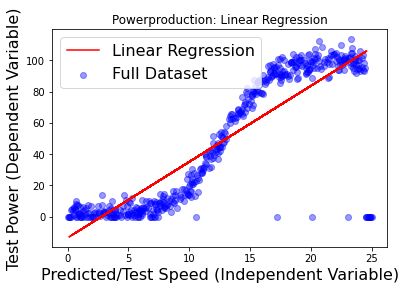

In [56]:
plt.plot(x_test, y_predict, color='r', label="Linear Regression")

# Create a scatterplot graphing predictions against true data
plt.scatter(x, y, color='b', label="Full Dataset",
        alpha=.4)

plt.legend()
plt.title("Powerproduction: Linear Regression")
plt.xlabel("Predicted/Test Speed (Independent Variable)")
plt.ylabel("Test Power (Dependent Variable)")

In [57]:
MAE = mean_absolute_error(y_test, y_predict)
MAE

14.777550003831136

### GradientBoostingRegressor()

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train)

0.9936638387860953

In [59]:
model.score(x_test, y_test)

0.9186492370852416

In [60]:
model.score(x_test, y_test)

0.9186492370852416

### RandomForestRegressor()

In [61]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0).fit(x_train, y_train)
model.score(x_train, y_train)

0.9923521043138447

In [62]:
model.score(x_test, y_test)

0.9197602248970694

In [63]:
model.score(x_test, y_test)

0.9197602248970694

### 2.2. Polynomial Linear Regression Using Sklearn

#### What is it?

Polynomial Regression is is a type of regression analysis where the relationship between the independent variable (x) and dependent variable (y) are modelled as the *nth degree* in x.

The word Polynomial comes from the Greek word 'poly' meaning many and the Latin word 'nomial' meaning terms. Therefore, it directly translates as 'many terms'. 

This applies to Polynomial Regression, whereby, the Polynomial equations that drive the analysis models contain a number of terms.

This is demonstrated by the graph below, whereby a polynomial is presented that contains 3 terms, one cubic, one quadratic and one linear, as well as a leading coefficient and a constant.

<img src="https://slideplayer.com/slide/14484666/90/images/7/%F0%9D%9F%91%F0%9D%92%99+%F0%9D%9F%91+%E2%88%92+%F0%9D%9F%93%F0%9D%92%99+%F0%9D%9F%90+%E2%88%92%F0%9D%9F%90%F0%9D%92%99%2B%F0%9D%9F%8F+Parts+of+a+polynomial+Cubic+term+Linear+term.jpg" style="width: 450px;"> 



The models produced by Polynomial Regression, are non-linear as they produce estimations that do not fit a straight line. It fits a non-linear relationship between the value of x and the corresponding conditional mean of y, denoted as *E(y|x)* (i2tutorials). 

Despite fitting a non-linear model, Polynomial Regression operates as a linear statistical estimator. 

Furthermore, Polynomial Regression is a special case of Multiple Linear Regression.

#### Utility for Powerproduction Dataset

As previously demonstrated, Simple Linear Regression did not produce satisfactory estimation of the relationship between the independent variable *speed* or the dependent variable *power*. This was the case for both regression using Numpy and tha of Sklearn.

<br>

***

### Creating Test and Training Data for Polynomial Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

x = df["speed"]
y = df["power"]
y = y.values

# Use old seeding method on numpy to provide random train and 
# test variables
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                    test_size= 0.25, random_state=0)

# transform the data to include another axis
x_train = x_train[:, np.newaxis]
y_train = y_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]
y_test = y_test[:, np.newaxis]

# Create variable featuring Polynomial of 3 degrees and fit to 
# the standardized features of x_train using .fit_transform()
x_poly = PolynomialFeatures(degree=3).fit_transform(x_train)

# Assign model variable to LinearRegression()fitted with x_poly and y_train
model = LinearRegression().fit(x_poly, y_train)

# Assign prediction variable to the prediction of x_poly
y_poly_pred = model.predict(x_poly)

# Print Model coefficient
coefficient_3 = model.coef_
print("Sklearn Polynomial Coefficients: ", coefficient_3)

# Print R² of model
r_sq_3 = round(r2_score(y_train,y_poly_pred), 3)
print("R² of Polynomial Model:  ", r_sq_3)

# Use operator.itemgetter with sorted to zip items from x_train and 
# y_poly_pred together to provide data for regression line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_train,y_poly_pred), key=sort_axis)
x_pred, y_poly_pred = zip(*sorted_zip)

Sklearn Polynomial Coefficients:  [[  0.         -13.33262227   1.93710856  -0.05363941]]
R² of Polynomial Model:   0.881


***

### Scatterplot of Polynomial Regression of Test/Training Data

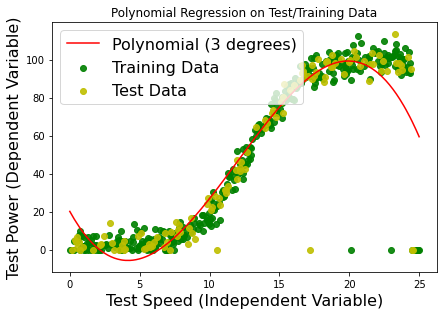

In [28]:
# Plot test data and training data on scatterplots
plt.scatter(x_train, y_train, color='g', label="Training Data", alpha=0.9)
plt.scatter(x_test, y_test, color='y', label="Test Data", alpha=0.9)

# Plot zipped data for regression line and format with labels, legend
# and title
plt.plot(x_pred, y_poly_pred, color='r', label="Polynomial (3 degrees)")

plt.legend()
plt.tight_layout()
plt.title("Polynomial Regression on Test/Training Data")
plt.xlabel("Test Speed (Independent Variable)")
plt.ylabel("Test Power (Dependent Variable)")
plt.show()

#### The model coefficients are:

<br>

***

### Scatterplot of Polynomial Regression on Real Data

In [29]:
# Load in real variables variables
x = df["speed"]
y = df["power"]
y = y.values

# Add new axis to x and y arrays to allow splitting
x = x[:, np.newaxis]
y = y[:, np.newaxis] 

# Create variable featuring Polynomial of 3 degrees and fit to 
# the standardized features of x_train using .fit_transform()
polynomial_features= PolynomialFeatures(degree=3).fit_transform(x)
x_poly = polynomial_features

model_2 = LinearRegression().fit(x_poly, y)
y_poly_pred = model_2.predict(x_poly)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)


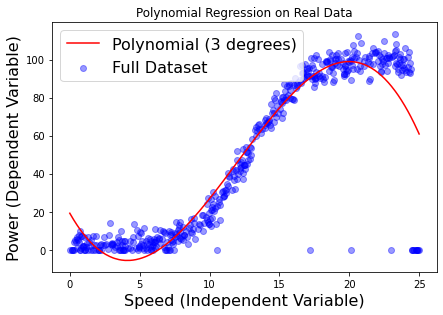

In [30]:
# Plot real 'speed' and 'power' data on scatterplots
plt.scatter(x, y, color='b', label="Full Dataset", alpha=0.4)

# Plot zipped data for regression line and format with labels, legend
# and title
plt.plot(x, y_poly_pred, color='r', label="Polynomial (3 degrees)")

plt.legend()
plt.tight_layout()
plt.title("Polynomial Regression on Real Data")
plt.xlabel("Speed (Independent Variable)")
plt.ylabel("Power (Dependent Variable)")
plt.show()

#### The model coefficients on the real data are:

In [31]:
model_2.coef_

array([[  0.        , -12.94285866,   1.89485751,  -0.05241927]])

In [32]:
x_test.shape
x_test.shape

(125, 1)

In [33]:
y.shape

(500, 1)

In [34]:
y_poly_pred.shape

AttributeError: 'tuple' object has no attribute 'shape'